# **Task :**
# **Stock Prediction :**
### Take stock price of any company youwant and predicts its price by using LSTM.

In [2]:
import pandas as pd

# Get the stocks data from Tiingo API

In [3]:
#getting stock price data from Tiingo
from tiingo import TiingoClient

config = {
    'session': True,
    'api_key': "7012829c4f9717a201bea15de0719ae1e2baa685",
}

client = TiingoClient(config)

# Define the stock symbol and date range
symbol = 'AAPL'
start_date = '2018-01-01'
end_date = '2023-11-09'

df = client.get_ticker_price(symbol, startDate=start_date, endDate=end_date, fmt='csv')


# Save data to csv

In [4]:
csv_string =df

# Specify the file path
file_path = 'AAPL.csv'

# Write the CSV string to a file
with open(file_path, 'w') as file:
    file.write(csv_string)

# EDA

In [5]:
#pandas read AAPL csv file
df = pd.read_csv('AAPL.csv')

In [6]:
df

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2018-01-02,172.26,172.30,169.26,170.16,25048048,40.774510,40.783978,40.064400,40.277433,100192192,0.0,1.0
1,2018-01-03,172.23,174.55,171.96,172.53,28819653,40.767409,41.316560,40.703499,40.838420,115278612,0.0,1.0
2,2018-01-04,173.03,173.47,172.08,172.54,22211345,40.956771,41.060921,40.731903,40.840787,88845380,0.0,1.0
3,2018-01-05,175.00,175.37,173.05,173.44,23016177,41.423077,41.510657,40.961505,41.053820,92064708,0.0,1.0
4,2018-01-08,174.35,175.61,173.93,174.35,20134092,41.269220,41.567466,41.169804,41.269220,80536368,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1470,2023-11-03,176.65,176.82,173.35,174.24,79829246,176.650000,176.820000,173.350000,174.240000,79829246,0.0,1.0
1471,2023-11-06,179.23,179.43,176.21,176.38,63841310,179.230000,179.430000,176.210000,176.380000,63841310,0.0,1.0
1472,2023-11-07,181.82,182.44,178.97,179.18,70529966,181.820000,182.440000,178.970000,179.180000,70529966,0.0,1.0
1473,2023-11-08,182.89,183.45,181.59,182.35,49340282,182.890000,183.450000,181.590000,182.350000,49340282,0.0,1.0


In [7]:
df.shape

(1475, 13)

# Separate the targeted stock prices

In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0       172.26
1       172.23
2       173.03
3       175.00
4       174.35
         ...  
1470    176.65
1471    179.23
1472    181.82
1473    182.89
1474    182.41
Name: close, Length: 1475, dtype: float64

Stock

# Plot the actual stock prices

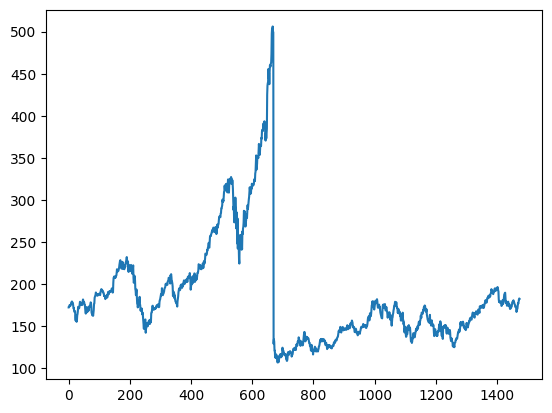

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [11]:
import numpy as np

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [13]:
df1 = df1.values.reshape(-1,1)

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df1 = scaler.fit_transform(df1)

# Split the data into train and test

In [14]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
training_size,test_size

(958, 517)

### Make data for LSTM as X_train, y_train, X_test, y_test

In [16]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [17]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(857, 100)
(857,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(416, 100)
(416,)


(None, None)

In [20]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

### Build the LSTM model

In [21]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [22]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
14/14 [==============================] - 9s 169ms/step - loss: 0.0245 - val_loss: 6.3310e-04
Epoch 2/100
14/14 [==============================] - 1s 71ms/step - loss: 0.0099 - val_loss: 4.8310e-04
Epoch 3/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0089 - val_loss: 4.1081e-04
Epoch 4/100
14/14 [==============================] - 1s 60ms/step - loss: 0.0078 - val_loss: 5.7100e-04
Epoch 5/100
14/14 [==============================] - 1s 65ms/step - loss: 0.0066 - val_loss: 3.0549e-04
Epoch 6/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0066 - val_loss: 4.2305e-04
Epoch 7/100
14/14 [==============================] - 1s 77ms/step - loss: 0.0058 - val_loss: 9.6324e-04
Epoch 8/100
14/14 [==============================] - 1s 64ms/step - loss: 0.0055 - val_loss: 4.1189e-04
Epoch 9/100
14/14 [==============================] - 1s 63ms/step - loss: 0.0043 - val_loss: 7.1347e-04
Epoch 10/100
14/14 [==============================] - 1s 64ms/s

### Make Predictions

In [25]:
import tensorflow as tf

In [26]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

13/13 [==============================] - 0s 11ms/step


In [27]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

### Plot the comparison between actual and predicted

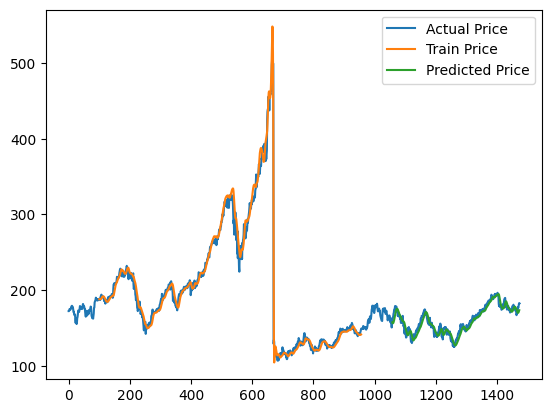

In [28]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1),label="Actual Price")
plt.plot(trainPredictPlot,label="Train Price")
plt.plot(testPredictPlot,label="Predicted Price")
plt.legend()
plt.show()

In [29]:
len(test_data)

517

### Predict next 30 days with last 100 days data

In [30]:
#taking last 100 days data
x_input=test_data[417:].reshape(1,-1)
x_input.shape


(1, 100)

In [31]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [32]:
temp_input

[0.1931621790857858,
 0.2007764558547276,
 0.19997495303694424,
 0.19644333124608637,
 0.2034314339386349,
 0.2064120225422667,
 0.2072636192861615,
 0.21823418910457104,
 0.21445209768315587,
 0.21162179085785848,
 0.21282404508453345,
 0.20999373825923606,
 0.20480901690670006,
 0.20348152786474638,
 0.20771446462116466,
 0.20964308077645577,
 0.21001878522229173,
 0.21828428303068248,
 0.2176330619912335,
 0.22106449592986843,
 0.21613024420788973,
 0.21314965560425791,
 0.215178459611772,
 0.21735754539762048,
 0.21956167814652466,
 0.21635566687539132,
 0.22289292423293672,
 0.22444583594239192,
 0.22232936756418276,
 0.21475266123982467,
 0.21122103944896675,
 0.1882279273638071,
 0.18036318096430803,
 0.18274264245460237,
 0.1787100814026299,
 0.17815904821540385,
 0.17770820288040068,
 0.18189104571070758,
 0.1768566061365059,
 0.1746524733876017,
 0.16821540388227924,
 0.16944270507200998,
 0.17282404508453347,
 0.17630557294927984,
 0.18604884157795865,
 0.17417658108954281,


### Split target data of last 100 days and 30 days

In [33]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.17488301]
101
1 day input [0.20077646 0.19997495 0.19644333 0.20343143 0.20641202 0.20726362
 0.21823419 0.2144521  0.21162179 0.21282405 0.20999374 0.20480902
 0.20348153 0.20771446 0.20964308 0.21001879 0.21828428 0.21763306
 0.2210645  0.21613024 0.21314966 0.21517846 0.21735755 0.21956168
 0.21635567 0.22289292 0.22444584 0.22232937 0.21475266 0.21122104
 0.18822793 0.18036318 0.18274264 0.17871008 0.17815905 0.1777082
 0.18189105 0.17685661 0.17465247 0.1682154  0.16944271 0.17282405
 0.17630557 0.18604884 0.17417658 0.17976205 0.18371947 0.19356293
 0.20240451 0.20295554 0.20693801 0.20753914 0.19053225 0.17713212
 0.17868503 0.18164058 0.17397621 0.16874139 0.17257358 0.17074515
 0.17815905 0.18091421 0.1719474  0.16804008 0.17019411 0.17342517
 0.16310582 0.15927364 0.15992486 0.1612273  0.16758923 0.16420789
 0.16736381 0.17049468 0.17695679 0.18071384 0.17921102 0.18274264
 0.18502192 0.18036318 0.18003757 0.1761052  0.17282405 0.17187226
 0.16541014 0.16571071 0.16681277 

In [34]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

### Plot the continous 30 days prediction

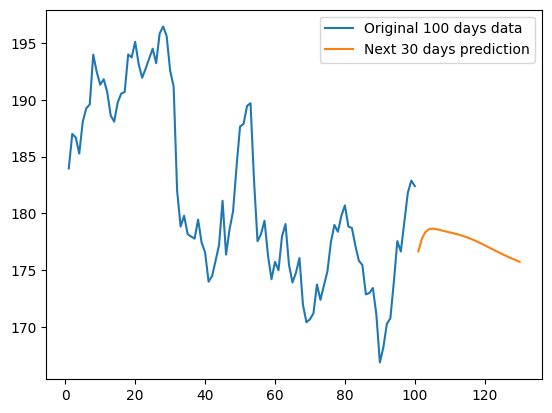

In [35]:
plt.plot(day_new,scaler.inverse_transform(df1[1375:]),label='Original 100 days data')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Next 30 days prediction')
plt.legend()

